In [1]:
import os
import vector
import mplhep
import numpy as np
import awkward as ak
import boost_histogram as bh
import matplotlib.pyplot as plt

In [2]:
data_dir = '/eos/user/l/ltani/ML-tau-data'
zh_path = os.path.join(data_dir, 'zh.parquet')
z_path = os.path.join(data_dir, 'z.parquet')
qq_path = os.path.join(data_dir, 'qq.parquet')

In [3]:
zh_data = ak.from_parquet(zh_path)
z_data = ak.from_parquet(z_path)
qq_data = ak.from_parquet(qq_path)

In [4]:
# Print number of jets in the datasets
print(f"[ZH (H->tautau)] \t Num jets: {len(zh_data)}")
print(f"[Z  (Z->tautau)] \t Num jets: {len(z_data)}")
print(f"[qq] \t\t\t Num jets: {len(qq_data)}")

[ZH (H->tautau)] 	 Num jets: 530722
[Z  (Z->tautau)] 	 Num jets: 457547
[qq] 			 Num jets: 3523428


In [5]:
# Access properties associated for each jet. Same for each dataset
zh_data.fields

['reco_cand_p4s',
 'reco_cand_charge',
 'reco_cand_pdg',
 'reco_jet_p4s',
 'reco_cand_dz',
 'reco_cand_d3',
 'reco_cand_dz_err',
 'reco_cand_d3_err',
 'reco_cand_d0',
 'reco_cand_z0',
 'reco_cand_d0_err',
 'reco_cand_z0_err',
 'gen_jet_p4s',
 'gen_jet_tau_decaymode',
 'gen_jet_tau_p4s',
 'gen_jet_full_tau_p4s']

## Description of variables

|  Name |  Description |
|---|---|
| reco_cand_p4s | 4-momenta per reco cand in the reco jet. |
| reco_cand_charge | Charge per cand in the jet.|
| reco_cand_pdg | PDGid per cand in the jet.|
| reco_jet_p4s | RecoJet 4-momenta. |
| reco_cand_dz | Longitudinal impact parameter per cand in the jet. For future steps. Fill value used for neutral cands as no track parameters can be calculated. |
| reco_cand_d3 | 3D distance between the track and the reference point per cand in the jet. For future steps. Fill value used for neutral cands as no track parameters can be calculated. |
| reco_cand_dz_err | Uncertainty of the longitudinal impact parameter per cand in the jet. For future steps. Fill value used for neutral cands as no track parameters can be calculated. |
| reco_cand_d3_err | Uncertainty of the 3D distance between the track and the reference point per cand in the jet. For future steps. Fill value used for neutral cands as no track parameters can be calculated. |
| reco_cand_d0 | Distance between the track and the reference point in x-y plane per cand in the jet. For future steps. Fill value used for neutral cands as no track parameters can be calculated. |
| reco_cand_z0 | Distance between the track and the reference point in z-direction per cand in the jet. For future steps. Fill value used for neutral cands as no track parameters can be calculated. |
| reco_cand_d0_err | Uncertainty of the distance between the track and the reference point in x-y planeper cand in the jet. For future steps. Fill value used for neutral cands as no track parameters can be calculated. |
| reco_cand_z0_err | Uncertainty of the distance between the track and the reference point in z-direction per cand in the jet. For future steps. Fill value used for neutral cands as no track parameters can be calculated. |
| gen_jet_p4s | GenJet 4-momenta. Matched with RecoJet within a cone of radius dR < 0.4.|
| gen_jet_tau_decaymode | Decay mode of the associated genTau. Jets that have associated leptonically decaying taus are removed, so there are no DM=16 jets. If no GenTau can be matched to GenJet within dR<0.4, fill value is used. |
| gen_jet_tau_p4s | Visible 4-momenta of the genTau. If no GenTau can be matched to GenJet within dR<0.4, fill value is used. |
| gen_jet_full_tau_p4s | Full 4-momenta (with neutrino) of the genTau matched to the genJet and recoJet. If no GenTau can be matched to GenJet within dR<0.4, fill value is used. (For debugging purposes)|

In [6]:
# Create 4-vectors from the information in the .parquet file data and access information such as energy or pT:

def to_p4(p4_obj):
    return vector.awk(
        ak.zip(
            {
                "mass": p4_obj.tau,
                "x": p4_obj.x,
                "y": p4_obj.y,
                "z": p4_obj.z,
            }
        )
    )

def to_bh(data, bins, cumulative=False):
    h1 = bh.Histogram(bh.axis.Variable(bins))
    h1.fill(data)
    if cumulative:
        h1[:] = np.sum(h1.values()) - np.cumsum(h1)
    return h1

gen_tau_p4s = to_p4(zh_data.gen_jet_tau_p4s)
gen_tau_pt = gen_tau_p4s.pt


Text(0, 0.5, 'Number of reco jets / bin')

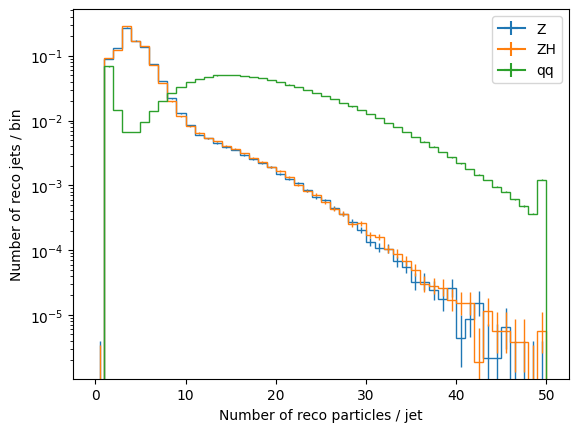

In [7]:
# Get number of particles per jet:
bins = np.linspace(0,50,51)
mplhep.histplot(to_bh(ak.num(z_data["reco_cand_p4s"]), bins=bins), histtype="step", lw=1, flow="sum", label="Z", density=True)
mplhep.histplot(to_bh(ak.num(zh_data["reco_cand_p4s"]), bins=bins), histtype="step", lw=1, flow="sum", label="ZH", density=True)
mplhep.histplot(to_bh(ak.num(qq_data["reco_cand_p4s"]), bins=bins), histtype="step", lw=1, flow="sum", label="qq", density=True)
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("Number of reco particles / jet")
plt.ylabel("Number of reco jets / bin")

Text(0, 0.5, 'Number of gen jets / bin')

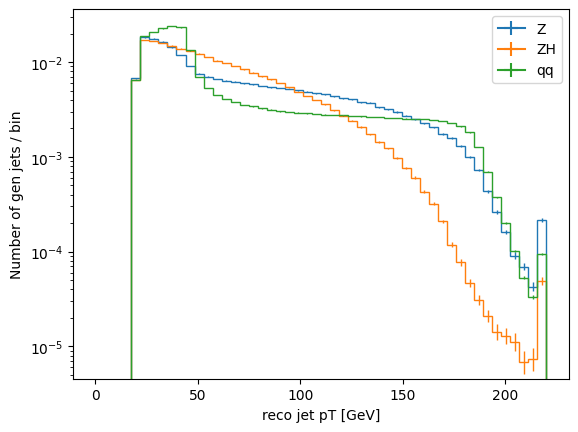

In [8]:
bins = np.linspace(0,220,51)
mplhep.histplot(to_bh(to_p4(z_data["reco_jet_p4s"]).pt, bins=bins), histtype="step", lw=1, flow="sum", label="Z", density=True)
mplhep.histplot(to_bh(to_p4(zh_data["reco_jet_p4s"]).pt, bins=bins), histtype="step", lw=1, flow="sum", label="ZH", density=True)
mplhep.histplot(to_bh(to_p4(qq_data["reco_jet_p4s"]).pt, bins=bins), histtype="step", lw=1, flow="sum", label="qq", density=True)
plt.legend(loc="best")
plt.yscale("log")
plt.xlabel("reco jet pT [GeV]")
plt.ylabel("Number of gen jets / bin")

Text(0, 0.5, 'matched jets / bin')

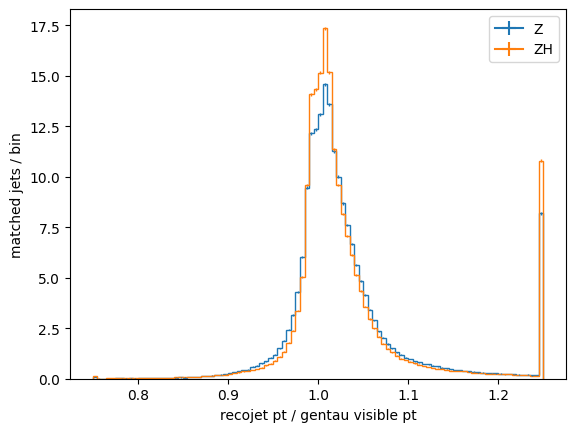

In [9]:
bins = np.linspace(0.75,1.25,101)

mplhep.histplot(
    to_bh(
        to_p4(z_data["reco_jet_p4s"]).pt / to_p4(z_data["gen_jet_tau_p4s"]).pt
    , bins=bins), histtype="step", lw=1, flow="sum", label="Z", density=True)

mplhep.histplot(
    to_bh(
        to_p4(zh_data["reco_jet_p4s"]).pt / to_p4(zh_data["gen_jet_tau_p4s"]).pt
    , bins=bins), histtype="step", lw=1, flow="sum", label="ZH", density=True)
plt.legend(loc="best")
# plt.yscale("log")
plt.xlabel("recojet pt / gentau visible pt")
plt.ylabel("matched jets / bin")

## Decaymode mapping:

| # | Name |
|---|---|
| 0 | OneProng0PiZero | 
| 1 | OneProng1PiZero | 
| 2 | OneProng2PiZero | 
| 3 | OneProng3PiZero | 
| 4 | OneProngNPiZero | 
| 5 | TwoProng0PiZero | 
| 6 | TwoProng1PiZero | 
| 7 | TwoProng2PiZero | 
| 8 | TwoProng3PiZero | 
| 9 | TwoProngNPiZero | 
| 10 | ThreeProng0PiZero | 
| 11 | ThreeProng1PiZero | 
| 12 | ThreeProng2PiZero | 
| 13 | ThreeProng3PiZero | 
| 14 | ThreeProngNPiZero | 
| 15 | RareDecayMode |

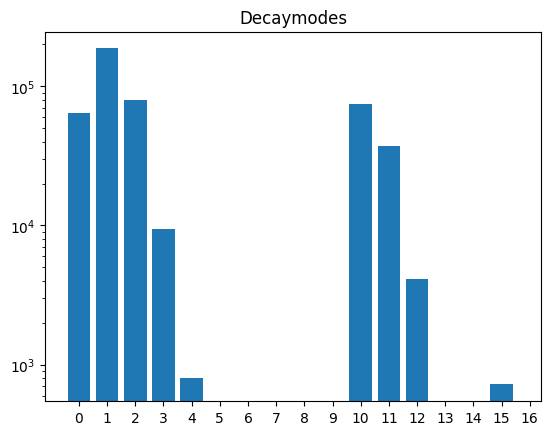

In [10]:
dms = np.arange(17)
plt.title("Decaymodes")
plt.hist(
    z_data["gen_jet_tau_decaymode"], bins=dms,
    width=0.8
)
plt.yscale('log')
plt.xticks(dms+0.4, dms);